To validate some different RL algorithms the original FrozenLake-v0 environment is used. FrozenLake-v0 is considered solved when the agent obtains an average reward of at least $0.78$ over $100$ consecutive episodes.

### Parameters

In [106]:
import numpy as np
import gym
import random

%matplotlib inline

%run visualization_and_metrics.py

env = gym.make('FrozenLake-v0')
env = env.unwrapped

### Value Iteration

In [107]:
%run value_iteration.py

gamma = 0.99

v = value_iteration(env, gamma, 100000, 1e-20)
policy = extract_policy(env, v, gamma)
visualize_policy_FL(policy)
print("Average reward over 100 episodes : "+str(average_n_episodes(env, policy, 100)))

Converged at 995
LUUU
LHLH
UDLH
HRDH
Average reward over 100 episodes : 0.81


### Policy Iteration

In [111]:
%run policy_iteration.py

gamma = 0.99

policy = policy_iteration(env, gamma, 100000, 1e-20)
visualize_policy_FL(policy)
print("Average reward over 100 episodes : "+str(average_n_episodes(env, policy, 100)))

Converged at 4
LUUU
LHLH
UDLH
HRDH
Average reward over 100 episodes : 0.81


<Figure size 432x288 with 0 Axes>

### Q-Learning

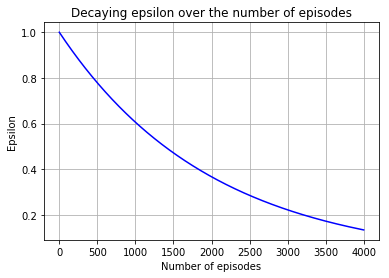

LULU
LHRH
UDLH
HRDH
Average reward over 100 episodes : 0.78


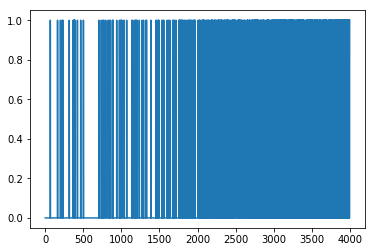

In [109]:
%run q_learning.py

alpha, gamma = 0.05, 0.99
nb_episodes, nb_steps = 4000, 100
epsilon, epsilon_min, epsilon_decay = 1, 0.01, 0.9995

q_table, rList = q_learning(env, alpha, gamma, nb_episodes, nb_steps, epsilon, epsilon_min, epsilon_decay)
policy = q_to_policy_FL(q_table)
visualizing_epsilon_decay(nb_episodes, epsilon, epsilon_min, epsilon_decay)
visualize_policy_FL(policy)
print("Average reward over 100 episodes : "+str(average_n_episodes(env, policy, 100)))
plt.plot(rList)

### Deep-Q-Learning

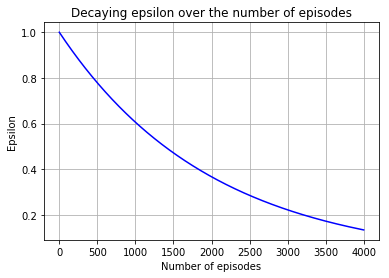

RUUU
LHRH
UDLH
HRDH
Average reward over 100 episodes : 0.84


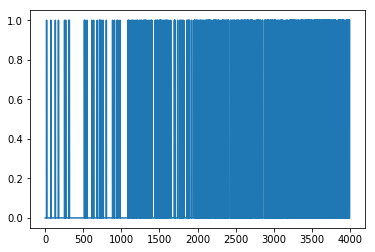

In [110]:
%run deep_q_learning_tf.py

alpha = 0.05, 0.99
nb_episodes, nb_steps = 4000, 100
epsilon, epsilon_min, epsilon_decay = 1, 0.01, 0.9995

visualizing_epsilon_decay(nb_episodes, epsilon, epsilon_min, epsilon_decay)
q_table, rList = dql(env, gamma, nb_episodes, nb_steps, epsilon, epsilon_min, epsilon_decay)
policy = q_to_policy_FL(q_table)
visualize_policy_FL(policy)
print("Average reward over 100 episodes : "+str(average_n_episodes(env, policy, 100)))
plt.plot(rList)